# Programming Assignment 2 - Polynomial Regression (50 points)

## Before you start

For this semester, the teaching staff of this course will be using Autograder to grade programming assignment. Here are three things we would like you to know before starting. `PLEASE READ CAREFULLY.` Otherwise, you might lose points on some questions.

* If you see any blocks containing statements like `grader.check("Qxx")`, please `do not modify` them. You can add new cells to the notebook, but just make sure there is `no other cells` between the answer cells containing tag `# TODO Qxx` and grading cells like 'grader.check("Qxx")`. 

* If the instructions say that you are required to use certain names for output variables, please `follow the instructions`, and you are not supposed to change the names of any given variables. You can still create new variables, but don't forget to `assign the output variables to correct values`. If the `type` of a output variable is specified, make sure the type of the variable is correct.

* You can use print statements to print out results through out the notebook. However, if you have any `print statements in functions`, please make sure you have `put them in comments` before you submit.

* Please note for questions that require you to plot, please **_DO NOT MODIFY_** statements like `plt.show(block=False)`. Changing the statement would block the execution of autograder and you might lose points on that question.

* Please `APPEND YOUR NYU NETID` to the name your submission (for example, name your submission as "HW1_prog_abc12345.ipynb" when you submit on Gradescope, and replace <abc1234> with your NYU NetID). 

Good luck with programming assignment 2!

## Overview

In this assignment, you will explore 
* polynomial transformations of the data set and the concept of overfitting 
* how regularization reduces overfitting for one of the polynomial transformations that overfit
* how the training error and validation error change when the number of training examples increased. You will view these changes by plotting the learning curves.


Due to the small number of training examples, if you play with the data set you will observe outcomes that are due to chance.  With a larger dataset things would be more stable.  
We kept the number of examples small so it is easy to understand.  In high dimensionality we would expect the dataset to be more spread out than in our toy example for this homework assignment.  In this notebook, our training examples are in $1$-D.

The assignment has four parts:
* First part: you will read in the dataset and perform train/validation split, visualize the training and validation set, and write the regularized closed form solution that will be used in the other parts of this assignment.
* Second part: you will perform univariate polynomial feature transformation and perform model selection.  In this part you will use the regularized closed form solution you wrote in part 1 with $\lambda=0$.
* Third part: you will take one of the overfitted models and observe what happens when you use $L2$ regularization when fitting the model.  In this part you will use the regularized closed form solution you wrote in part 1 with $\lambda \not=0$.
* Fourth part: you will use take one of the polynomial transformations that resulted in overfitting and observe what happens when you train on more examples (unregularized).  In this part, you will used the reguarized closed form solution you wrote in part 1 with $\lambda = 0$.

In your final project, you will use feature transformation and regularization at the same time to select the best model.     


In [1]:
# Run this cell
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# For every question including graph, please run it and leave the graphs in your output before you turn in the hw, it makes grading much easier. Your TAs do appreciate your cooperation.
### Points will be taken off if you don't display the graphs in your hw output.

# Part 1
## Preparing the Dataset

### Importing Data 
Import data from `data_hw2.csv`. Please put `data_hw2.csv` file under the **_SAME DIRECTORY_** of your `HW2_prog_<netid>.ipynb` file.

In [2]:
# TODO Q01
# read the data_hw2.csv into df(<pd.Dataframe>)
# then convert df to data(<np.ndarray>)
# and import the first column in X(<np.ndarray>) and the second column in Y(<np.ndarray>)
df = pd.read_csv('data_hw2.csv')
data = np.array(df)
X = data[:,0]
y = data[:,1]

# Next, we set nu_samp to be the number of examples, and N to be the 1/3 the number of original examples.  
# In part 2 and 3  you will only use N training examples.  In part 4 you will use 2N training examples.
nu_samp = X.shape[0]
N = np.int_(nu_samp/3)



In [3]:
# TODO Q02
# Reshape X and Y to be rank 2 matrices X_2d(<np.ndarray>) and y_2d(<np.ndarray>)
X_2d = X.reshape(-1, 1)
y_2d = y.reshape(-1, 1)

### Training and Validation Set
Set the training set to be the first 1/3 of the data and validation set to be the last 1/3 of the data.  (In parts 2 and 3 we won't use the full dataset). Normally we would have more data in the training set and less in the validation set.  However we are intentionally keeping the training set small so we can observe overfitting where the feature vector is $1$-D.

In [4]:
##### TODO Q03 
# Save the first N/3 rows in X_tr(<np.ndarray>), y_tr(<np.ndarray>)
# and the last N/3 to  in X_val(<np.ndarray>) and y_val(<np.ndarray>).  
# Examples indexed from 2N to nu_samp -1 are in the validation set
X_tr = X_2d[:X_2d.shape[0]//3]
y_tr = y_2d[:y_2d.shape[0]//3]
X_val = X_2d[2 * X_2d.shape[0]//3:]
y_val = y_2d[2 * y_2d.shape[0]//3:]


The shape of X_tr should be (11,1)

### Plotting Dataset

By plotting the training and validation set, we can observe the training and validation set are similar

Plot `X_tr` versus `y_tr` as a scatter plot. Make sure your plot has **grid lines**, a **_title_** and **_labels_** on axes. **_DO NOT MODIFY_** `plt.show(block=False)`



<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q04
manual: true
points: 3
-->

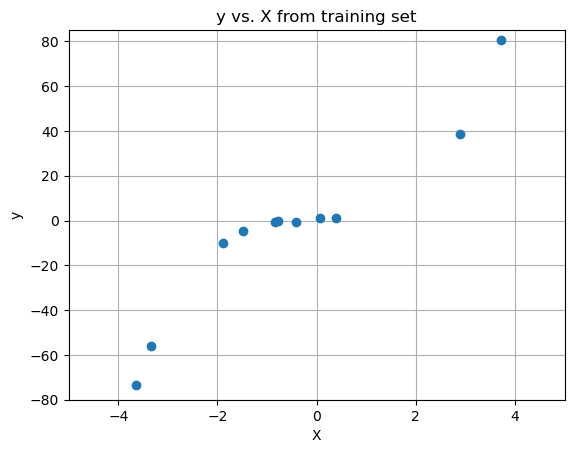

In [5]:
plt.xlim([-5, 5])
plt.ylim([-80, 85])
# TODO Q04 
# run this cell and observe the pattern of training data.
plt.plot(X_tr,y_tr,'o')
plt.title('y vs. X from training set')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show(block=False)

<!-- END QUESTION -->

Now that we have looked at the training data, lets look at the validation data.

Normally, we would not look at the validation set (or test set) until we use it to estimate how well our hypothesis will do in the future!  However, this assignment is about understanding how to use a validation set to select a model and we wanted you to observe that the validation set looks very similar to the training set.

Plot `y_val` versus `X_val` as a scatter plot. Make sure your plot has **grid lines**, a **_title_** and **_labels_** on axes. **_DO NOT MODIFY_** `plt.show(block=False)`

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q05
manual: true
points: 3
-->

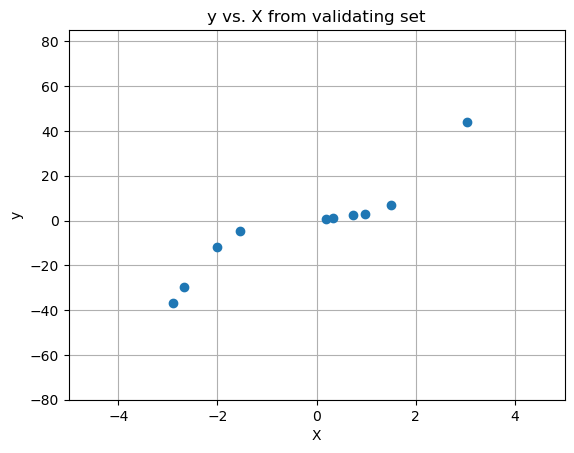

In [6]:
plt.xlim([-5, 5])
plt.ylim([-80, 85])
# TODO Q05
# plot the graph
plt.plot(X_val,y_val,'o')
plt.title('y vs. X from validating set')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show(block=False)

### Implement regularized linear regression

For parts 2, 3, and 4 we will be using the linear regression closed form solution or the regularized closed form solution to compute ${\bf w}$.

Below you will write the regularized closed form solution for linear regression.  When we wish to use the non-regularized closed form solution for linear regression, we can set $\lambda = 0$.

Write the function `poly_regression` that takes as input a design matrix $X$ (whose first column is a column of ones), ${\bf y}$ (the target vector) and $\lambda$ (the regularization parameter) and returns $(X^TX + N \lambda I')^{-1}X^T{\bf y}$.  Here, as long as $\lambda \not=0$ the inverse of $(X^TX + N \lambda I')$ exists. 

In the second part of this assignment, we will not use any regularization so we will set $\lambda =0$.  Fortunately, for this example, $X^TX$ is invertible.

In [7]:
# Note, here we are using lambda1 instead of lambda because lambda is a reserved word in Python.
def poly_regression(X,y,lambda1): # We are using X for the design matrix.  It might be that X is in Z-space
    d = X.shape[1] # number of features
    N = X.shape[0] # number of examples
    I = np.eye(d)
    I[0][0] = 0
    I_prime = I
    
    if lambda1 == 0:
        w = np.linalg.pinv(X.T @ X + lambda1 * N * I_prime) @ X.T @ y
    else:
        w = np.linalg.inv(X.T @ X + lambda1 * N * I_prime) @ X.T @ y
    return w

<!-- END QUESTION -->

# Part 2:

## Polynomial Transformation and Model Selection.

 To ease the notational burden, we are using $x$ for $x_1$ in this section.


In class we discussed polynomial regression.  Here we ask you to experiement with univariate polynomial regression (polynomial regression with one feature ${\bf x}=[x]$).  That is learning a function $w_0+w_1x+w_2x^2+\cdots + w_dx^d$ where $d$ is the the polynomial's highest degree.  We showed in class we can perform a feature transformation to $Z$-space:
$$ w_0 + w_1\phi_1(x)+w_2\phi_2(x) + \cdots + w_d\phi_d(x),$$
where $\phi({\bf x})=x^i$,  i.e. $z_i=x^i$. (For example: $x^2 = x\cdot x$) Remember: we are learning a linear function in $Z$-space.

In this part you will:
*  Trying different polynomial transformations of the data and observe the effects of different transformations on the training error and the validation error.
* Plot the different hypotheis and the training dataset to visually observe underfitting and overfitting
* Plot the learning curve for different transformations
* Use the validation error to select the best model

See if you can spot the underfitting and the overfitting in some of the transformations.

You will observe that after some of the transformations, the hypothesis didn't fit the traning data very well. 

You will observe that after some of the transformations, the hypothesis fit the training data very well, but the validation error is very large.


###  Trying different polynomial transformations of the data and observe the effects of different transformations on the training error and the validation error.

In the cell below write code to obtain polynomial regression models of different orders starting from linear regression i.e. `degree = 1` to higher degree models  `degree = 2 to 10`. 

In the following cell will perform the following:
* Perform the polynomial tranformation of your data using Sklearn's `PolynomialFeatures`  <blockquote> "Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]."</blockquote>
Note that it automatically augments the feature vector with a one unless you set `include_bias = False`.
* Fit the transformed data using the function you wrote in part 1 where you set $\lambda = 0$ (i.e. no regularizaton)
* For each transformation, compute the 
 * MSE for the training set ($\frac{1}{\lvert \text{X_tr_poly}\rvert}\sum_{{\bf x}^{(i)}\in\text{X_tr_poly}}(g({\bf x}^{(i)})-y^{(i)})^2$  and 
 * MSE for the validation set ($\frac{1}{\lvert \text{X_val_poly}\rvert}\sum_{{\bf x}^{(i)}\in\text{X_val_poly}}(g({\bf x}^{(i)})-y^{(i)})^2$

 Save these values in a list (`validation_costs` and `train_costs`)and save ${\bf w}$ in a dictionary (`w_dict`)

In the subsequent cell you will plot these errors vs degree of transformation. Afterwards, you will use the validion errors to determine the order that fits the data best. 


In [8]:
lambda1 = 0  # We set lambda1 = 0 since we are not using any regularization in part 2.

# Record (store) the training error, validation error and w in train_costs(<list>), validation_costs(<list>) and w_dict(<dict>) for degrees = 1, 2, 3,..., 10 
validation_costs_6 = []  
train_costs_6 = []       
w_dict_6 = {}

model_degree = range(1,11) # The different feature transformatons we will perform

for d in model_degree:
    print('Order: ', d)
    poly = PolynomialFeatures(d) # * generate all types of polynomial features up to degree d
    X_tr_poly = poly.fit_transform(X_tr) # * transforms the training data to have those polynomial features
    X_val_poly = poly.transform(X_val) # * transforms the validation data to have those polynomial features
    
    # TODO Q06
    # Use your function from part 1 to determine w. The design matrix is X_tr_poly and the target vector is y_tr and lambda1=0. 
    w = poly_regression(X_tr_poly, y_tr, lambda1)
    w_dict_6[d] = w  # save the value of w 
    
    # predict yhat for the training data, compute E_in (MSE for the training data) and store E_in in train_costs
    yhat = X_tr_poly @ w
    N_tr = X_tr_poly.shape[0]
    # TODO: confirm if ```+ lambda1 * np.sum(w**2)``` is correct or not
    E_in = 1/N_tr * np.sum((yhat - y_tr)**2) + lambda1 * np.sum(w**2)
    train_costs_6.append(E_in)  

    # predict yhat_val for the validation data, compute E_val (MSE for the validation data) and store E_val in validation_costs
    yhat_val = X_val_poly @ w
    N_val = X_val_poly.shape[0]
    E_val = 1/N_val * np.sum((yhat - y_val)**2) + lambda1 * np.sum(w**2)
    validation_costs_6.append(E_val) 
    
    print('w: ', w)
    print("X_tr_poly size:", X_tr_poly.shape)
    print("max:", np.max(X_tr_poly))
    print('E_in: ',E_in)
    print("E_val:", E_val)
    print('-------------------------')

Order:  1
w:  [[ 6.12808111]
 [17.16645921]]
X_tr_poly size: (11, 2)
max: 3.71
E_in:  135.04246821067755
E_val: 3617.9236624494743
-------------------------
Order:  2
w:  [[ 8.96319828]
 [17.2161395 ]
 [-0.57375004]]
X_tr_poly size: (11, 3)
max: 13.7641
E_in:  125.67961454024038
E_val: 3561.2516296646877
-------------------------
Order:  3
w:  [[0.71086258]
 [0.46162522]
 [0.0597233 ]
 [1.51161912]]
X_tr_poly size: (11, 4)
max: 51.064811
E_in:  0.10795564593327903
E_val: 3693.3555057747153
-------------------------
Order:  4
w:  [[ 0.6572657 ]
 [ 0.47390476]
 [ 0.1241157 ]
 [ 1.51079773]
 [-0.00490741]]
X_tr_poly size: (11, 5)
max: 189.45044880999998
E_in:  0.10245461832185453
E_val: 3690.4577379724915
-------------------------
Order:  5
w:  [[ 6.69940026e-01]
 [ 5.34318468e-01]
 [ 1.32323635e-01]
 [ 1.49304690e+00]
 [-5.69184585e-03]
 [ 1.01811626e-03]]
X_tr_poly size: (11, 6)
max: 702.8611650851
E_in:  0.10184379474034917
E_val: 3690.644354932661
-------------------------
Order:  6
w

If your code works correctly, in Order 10, the last three outputs should be:

max: 494013.81738478417

E_in:  0.00011159579586721235

E_val: 1645420.4645535438

### Plot the different hypotheis and the training dataset to visually observe underfitting and overfitting


Plot training dataset and the hypothesis function for each degree. Make sure your plot has **grid lines**, a **_title_** and **_labels_** on axes. **_DO NOT MODIFY_** `plt.show(block=False)`

Do you observe any underfitting or overfitting?

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q07
manual: true
points: 10
-->

Degree:  1


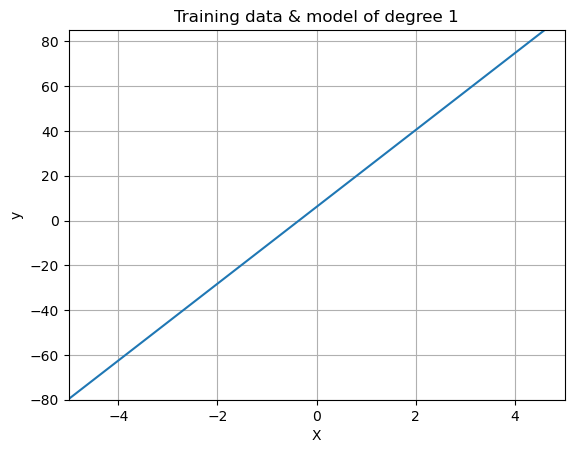

Degree:  2


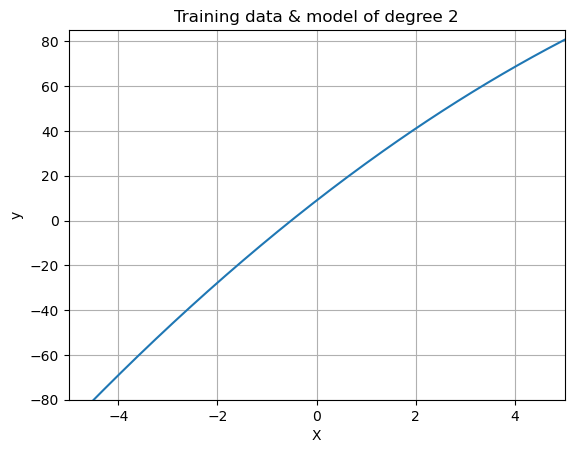

Degree:  3


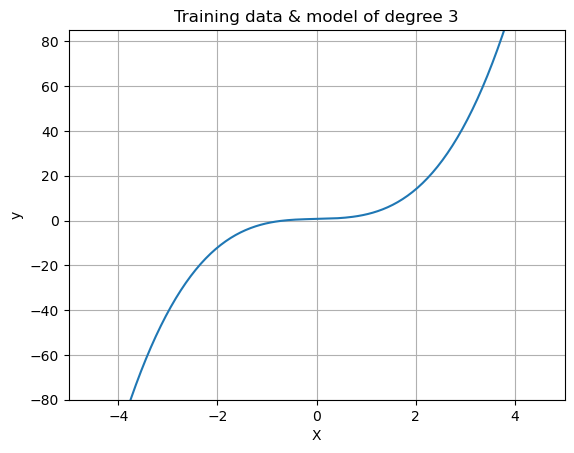

Degree:  4


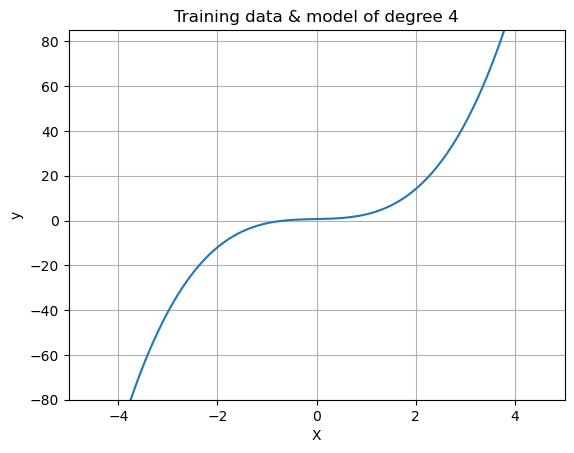

Degree:  5


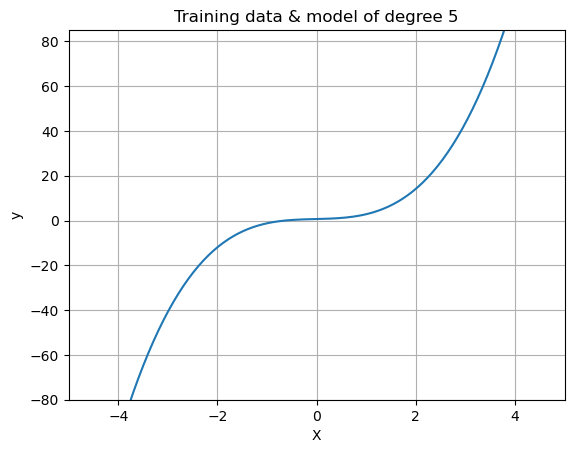

Degree:  6


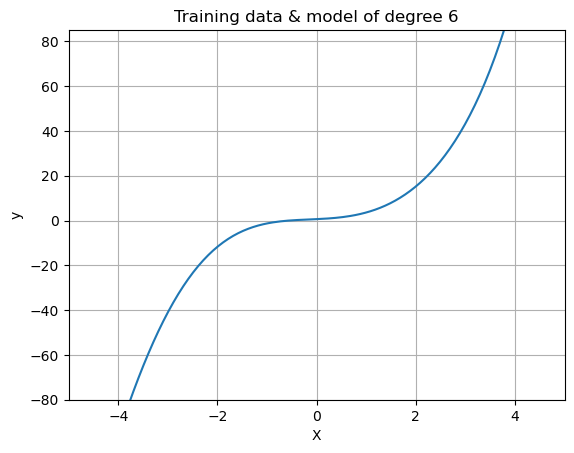

Degree:  7


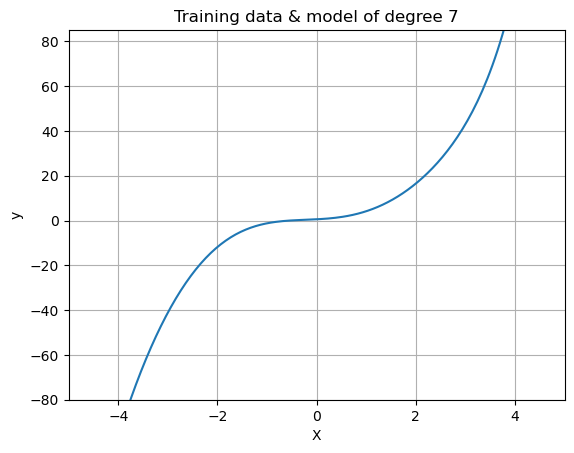

Degree:  8


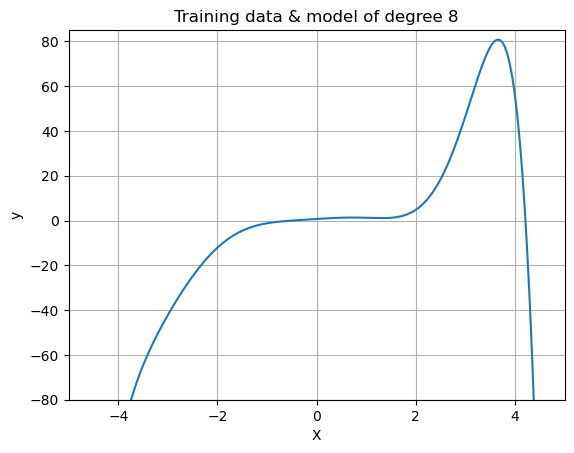

Degree:  9


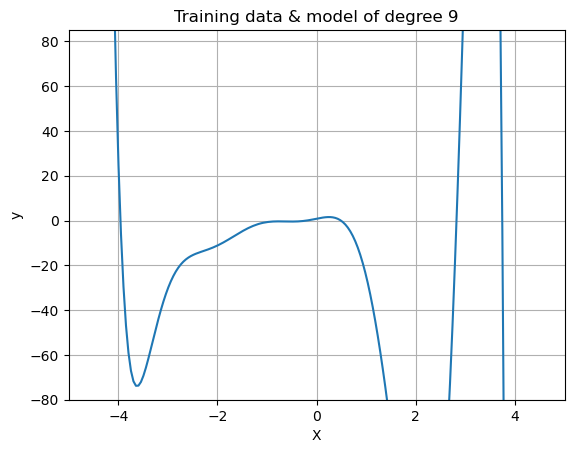

Degree:  10


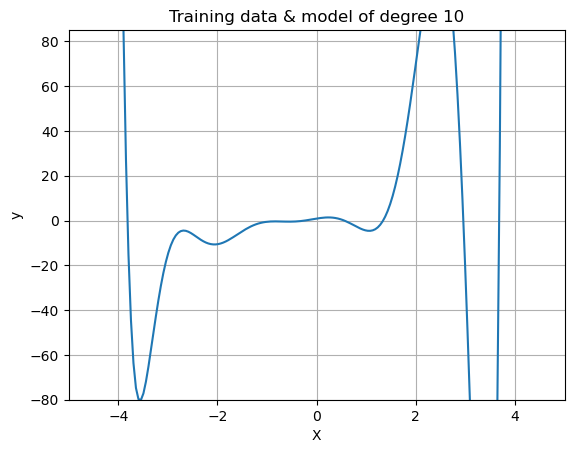

In [9]:
# TODO Q07
for d in model_degree:
    plt.xlim([-5, 5])
    plt.ylim([-80, 85])
    print('Degree: ', d)
    # Plot data
    ...    # type the following line of code plt.plot(X_tr, y_tr, 'o')
    
    # Plot hypothesis as a line
    poly = PolynomialFeatures(d)
    xp = np.linspace(-5,5,200).reshape((200,1))
    xp_d = poly.fit_transform(xp)
    yp_hat = xp_d.dot(w_dict_6[d])
    
    # Plot hypothesis
    plt.plot(xp,yp_hat)
    plt.xlim(-5,5)

    plt.title('Training data & model of degree '+ str(d))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.show(block=False)
    
    

<!-- END QUESTION -->



Plot `train_cost` versus `Model order` and `validation_cost` versus `Model order`  as line plots with style of `'.-'` in one graph. Make sure your plot has **grid lines**, a **_title_** and **_labels_** on axes. **_DO NOT MODIFY_** `plt.show(block=False)`

###  Plot the learning curve for different transformations


TypeError: float() argument must be a string or a number, not 'ellipsis'

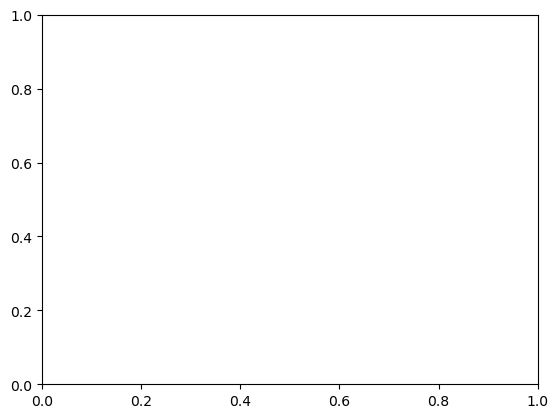

In [10]:
plt.ylim(0,1)
# TODO Q08
plt.plot(...)   # Training Cost vs Model Order.  Complete the code so it looks like plt.plot(model_degree, train_costs, '.-')
plt.plot(...)   # Validation Cost vs Model Order.
plt.title('Training ans Validation Cost vs Model order')
plt.xlabel('Model order')
plt.ylabel('Training and Validation Cost')
plt.grid(True)
plt.show(block=False)

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: Q09
manual: true
points: 4
-->

###  Use the validation error to select the best model
Next, determine which model had the smallest validation cost.

(Hint: you can use the numpy function np.argmin(...))

In [ ]:
# TODO Q09
imin = ...
print("Estimated model order= {0:d}".format(imin+1))

# Part 3.  Adding L2 regularization after a polynomial transformation of degree 10

There was extreme overfitting when you performed a polynomial transformation of degree 10 on the dataset.  Here we can observe that regularization can prevent some of the overfitting.  (Please note, we are using a very small dataset to demonstrate the ideas.)

In part 3 you will follow a similar approach as you did in part 2.  Specifically you will:
* A) Try different values of $\lambda$ and observe the effects of different values of $\lambda$ (i.e. different amounts of L2 regularization) on the training error and the validation error. For each value of $\lambda$ you will save the training error, validation error, and ${\bf w}$.
* B) Plot the different hypothesis and the training dataset to visually observe the effect of L2 regularization
* C) Plot the learning curve for different values of $\lambda$ (i.e. different amounts of L2 regularization)

See if you can observe how the L2 regularization is affecting the fit of the data.




### A) Try different values of $\lambda$ and observe the effects on the training error and the validation error. For each $\lambda$ save the training error, validation error, and ${\bf w}$ 


Finish writing the code below to observe what happens when we apply L2 regularization

In [ ]:
d=10
print('Order: ', d)
poly = PolynomialFeatures(d)
X_tr_poly = poly.fit_transform(X_tr) # transforms the training data
X_val_poly =poly.fit_transform(X_val) # transforms the validation data

validation_costs_10 = []
train_costs_10 = []
w_dict_10 = {}

lambda_values = np.logspace(-10, 1,10) # After finding the best lambda value, we should go and try more lambda values near the best one we have tried.  However, our goal here to show how regularization works - so we will skip that step. 

for lambda1 in lambda_values:
    
    # TODO Q10
    # Use your function from part 1 to determine w.
    w = ...
    w_dict_10[lambda1] = ... # save w for the current value of lambda1
    
    # predict yhat for the training data, compute E_in (MSE for the training data) and store E_in in train_costs
    yhat =...
    E_in = ...
    train_costs_10.append(...)

    # predict yhat_val for the validation data, compute E_val (MSE for the validation data) and store E_val in validation_costs
    yhat_val = ...
    E_val = ...
    validation_costs_10.append(...)
    
    print('w: ', w)
    print("Training size", X_tr_poly.shape)

    print('lambda:', np.around(lambda1,10))
    print('E_in: ',E_in)
    print("E_val:", E_val)
    print('-------------------------')

When lambda1 = 10.0, the errors should be:

lambda: 10.0

E_in:  0.4764905896187775

E_val 55.70512695896246

###  B) Plot the different hypotheis and the training dataset to visually observe the effect of L2 regularization


In [ ]:
poly = PolynomialFeatures(d)
xp = np.linspace(-5,5,200).reshape((200,1))
xp_d = poly.fit_transform(xp)
# TODO Q11

for lambda1 in lambda_values:
    plt.xlim([-5, 5])
    plt.ylim([-80, 85])
    print('lambda: ', lambda1)
    # Plot data
    plt.plot(X_tr,y_tr,'o')
    
    # Plot hypothesis as a line
    yp_hat = ...   # type the following: xp_d.dot(w_dict[lambda1])
    
    # Plot hypothesis
    plt.plot(xp,yp_hat)
    plt.xlim(-5,5)

    plt.title('Training data & model of degree '+ str(d))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.show(block=False)

###  C) Plot the learning curve for different values of $\lambda$ (different amounts of L2 regularization)


In [ ]:
plt.ylim(0,900)
plt.xscale("log",base=10)

# TODO Q12

# Plot the learning curve
plt.plot(...) #complete the code so it looks like plt.plot(lambda_values, train_costs,'.-')
plt.plot(...) # now plot the validation_costs instead of the train_costs

plt.title('Training and validation costs vs lambda values')
plt.ylabel('Training and validation costs')
plt.xlabel('lambda values')
plt.grid(True)
plt.show(block=False)

# Part 4: Increasing the number of training examples
In parts 2 and 3 we didn't use all the training data.  Here we observe what happens to the training and validation error when we add more training examples.


In this section we will observe what happens to the training and validation errors when the number of examples is increased.  

In [ ]:
lambda1=0
d=7
print('Order: ', d)
  
validation_costs_13 = []
train_costs_13 = []
w_dict_13 = {}

for i in range (N, 2*N):
    y_tr = y_2d[0:i]
    X_tr = X_2d[0:i]
    poly = PolynomialFeatures(d)
    X_tr_poly = poly.fit_transform(X_tr) # transforms the training data
    X_val_poly =poly.transform(X_val) #  transform the validation data (Yes, this is a bit inefficient since it doesn't change from one iteration until the next. )  

    # Fitting the model with a different number of training examples
    # TODO Q13
    # Determine w using the closed form solution from part 1 with lambda1 = 0
    w = ...
    w_dict_13[i] = ... # save w when the range is 0 to i-1
    
    # predict yhat for the training data, compute E_in (MSE for the training data) and store E_in in train_costs
    yhat = ...
    E_in = ...
    train_costs_13.append(...)

    # predict yhat_val for the validation data, compute E_val (MSE for the validation data) and store E_val in validation_costs
    yhat_val = ...
    E_val = ...
    validation_costs_13.append(...)
    
    print('w: ', w)
    print('lambda:', np.around(lambda1,4))
    print('Number of training examples:', X_tr_poly.shape[0])
    print('E_in: ',E_in)
    print("E_val:", E_val)
    print('-------------------------')

If your code works correctly, the last three lines of your output is:

Number of training examples: 21

E_in:  0.13978192068716794

E_val: 0.15515843749674452

In [ ]:
# Because the small number of training/validation sets we have odd fluxuations due to the outsized influence of a single example.  Each example has a larger influence on the hypothesis than would be true if there were more training examples.
plt.ylim(0,3)
# TODO Q14
values = np.arange(N,2*N)
plt.plot(...) # finish the code so it looks like plt.plot(values, train_costs,'.-')
plt.plot(...) # finish the code, but this time plot values and validation_costs

plt.title('Training and validation costs vs number of examples')
plt.ylabel('Training and validation costs')
plt.xlabel('Number of examples')
plt.grid(True)
plt.show(block=False)